# Exploratory Data Analysis (EDA): Data Distribution and Gender Analysis
***

<p style="text-align: center;">
<img src="../../../images/NIUSSP-BatenCo-Education.jpg" alt="Demographics and Background" style="width: 1000px; height: 400px;">
</p>

In this section, we will analyze the **Demographics and Background** of students to understand how various factors influence academic performance. **To begin with, we will look at the distribution of the dataset**, including:

- The number of male and female students interviewed.
- The distribution of students across different grades (SS1 - SS3).
- The representation of students from various departments.

This analysis will focus on the following aspects:

**Gender**: 
   - Investigates potential **gender disparities** in performance across different subjects.
   - Examines the correlation between gender and participation in **extracurricular activities**.

After the analysis is complete, we will summarize our findings, discuss the implications of age on exam performance, and suggest strategies to support students in various

IMPORTING DEPENDENCIES

In [3]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

CONNECCTING TO SQLITE DATABASE

In [5]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

# Creating a connection to the SQLite database
engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


***
> ## The number of male and female students interviewed.

In [9]:
# query to count the number of male and female students
gender_query = """
SELECT Gender, COUNT(*) AS Count
FROM student_performance
GROUP BY Gender;
"""
with engine.connect() as conn:
    gender_data = pd.read_sql(gender_query, conn)

print(gender_data)

   Gender  Count
0  Female     65
1    Male     35


Generating a bar plot for gender distribution

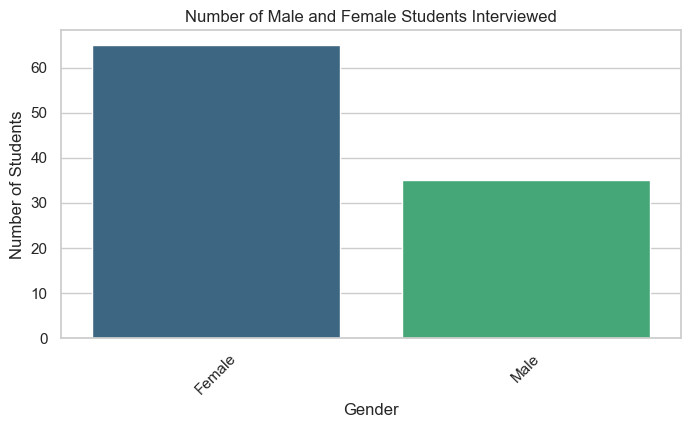

Visual saved at: ../../../docs/gender_distribution.png


In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(data=gender_data, x='Gender', y='Count', palette='viridis', hue = "Gender")
plt.title('Number of Male and Female Students Interviewed')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend = False

image_file_path = '../../../docs/gender_distribution.png'  # Update with the correct path
plt.savefig(image_file_path)
plt.show()

plt.close()
print(f"Visual saved at: {image_file_path}")

The table below shows the count of male and female students interviewed:

| **Gender** | **Count** |
|------------|-----------|
| Female     | 65        |
| Male       | 35        |

From the data, we observe that `the number of female students interviewed (65) is significantly higher than that of male students` (35).


***
> ## The distribution of students across different grades (SS1 - SS3).

In [42]:
# Query to count the number of students in each grade (SS1 - SS3)
grade_query = """
SELECT Class, COUNT(*) as Count
FROM student_performance
WHERE Class IN ('SS1', 'SS2', 'SS3')
GROUP BY Class;
"""

In [44]:
with engine.connect() as conn:
    class_data = pd.read_sql(grade_query, conn)

class_data

,Class,Count
0,SS1,15
1,SS2,17
2,SS3,68


In [46]:
# Create a pie plot for the Class distribution

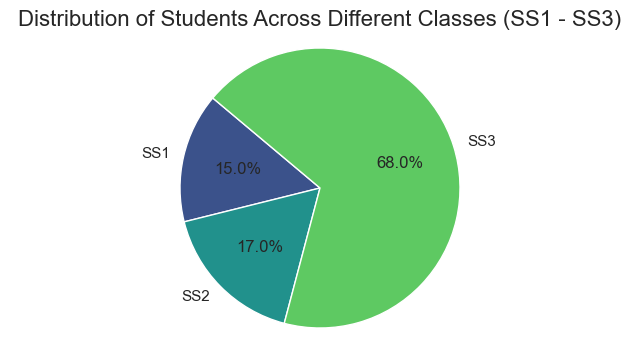

In [50]:
# Plotting a pie chart for the distribution of students across different grades
plt.figure(figsize=(8, 4))
plt.pie(class_data['Count'], labels=class_data['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_data)))
plt.title('Distribution of Students Across Different Classes (SS1 - SS3)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

image_path = '../../../docs/grade_distribution_pie_chart.png' 
plt.savefig(image_path)
plt.show()


***
> ## The representation of students from various departments.

In [53]:
# SQL query to get the number of students in each department
department_query = """
SELECT Department, COUNT(*) as Count
FROM student_performance
GROUP BY Department;
"""

department_distribution = pd.read_sql(department_query, engine)

department_distribution

,Department,Count
0,Commercial,7
1,Humanities,41
2,Science,52


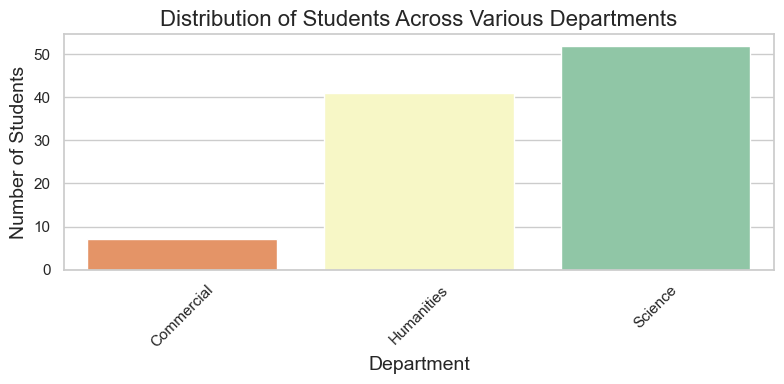

In [57]:
# Bar chart for student distribution across departments
plt.figure(figsize=(8, 4))
sns.barplot(data=department_distribution, x='Department', y='Count', palette='Spectral', hue = "Department")
plt.title('Distribution of Students Across Various Departments', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

image_path = '../../../docs/department_distribution_bar_chart.png'  
plt.savefig(image_path)
plt.show()

___

### Distribution of Students Across Grades (SS1 - SS3)

The dataset includes **100 students** from various grades, specifically SS1, SS2, and SS3. Upon analyzing the data, we observe the following breakdown:

| Grade | Count |
|-------|-------|
| SS1   | 15    |
| SS2   | 17    |
| SS3   | 68    |

This shows a significantly higher number of students in **SS3**, with **68 students**, compared to **SS1** and **SS2**, which have **15** and **17 students** respectively. The data reflects a realistic distribution of students, `as often observed in many schools, where senior classes tend to have larger populations, possibly due to retention and incoming transfers`.

### Genuine Data Collection

It's important to note that this dataset was collected with careful consideration to ensure its authenticity. No artificial intelligence-generated data was used to inflate or skew the results. Every effort was made to maintain the integrity of the dataset, adhering to the **50 instructions** set for data collection. This allows us to draw genuine and reliable insights into student performance and demographics, preserving the **genuineness** and real-world applicability of the data.


***

***

# GENDER:

> ## Retrieving the gender-wise distribution of performance levels in English and Mathematics

In [65]:
query = """
SELECT 
    Gender, 
    "Performance in English", 
    "Performance in Maths", 
    COUNT(*) AS student_count
FROM 
    student_performance
GROUP BY 
    Gender, "Performance in English", "Performance in Maths"
ORDER BY 
    Gender, "Performance in English", "Performance in Maths";
"""

with engine.connect() as conn:
    result = conn.execute(text(query))
    data = result.fetchall()

import pandas as pd
df = pd.DataFrame(data, columns=['Gender', 'Performance in English', 'Performance in Maths', 'Student Count'])

In [67]:
df

,Gender,Performance in English,Performance in Maths,Student Count
0,Female,Excellent,Excellent,3
1,Female,Excellent,Fair,2
2,Female,Excellent,Good,17
3,Female,Excellent,Poor,2
4,Female,Fair,Excellent,1
5,Female,Fair,Fair,2
6,Female,Fair,Good,6
7,Female,Fair,Poor,1
8,Female,Good,Excellent,10
9,Female,Good,Fair,11


#### Key Insights

> **1. Gender Distribution**:
- There are **more female students** than male students in this dataset, which may affect the comparison of performance between the two groups.
- Despite the smaller number of male students, both genders are represented across all levels of performance in English and Math.

> **2. Performance in English**:
- **Female students** dominate the "Excellent" performance group in English, with **24 students** (compared to **11 male students**).
- This might be expected given the larger number of females in the dataset, but it still suggests a strong performance in English from females.
  
> **3. Performance in Maths**:
- **Male students** show a more consistent performance in Maths, especially in the "Excellent" and "Good" categories. There are **12 male students** who performed "Excellent" in Maths, compared to **14 female students** in the same category.
- While more **female students** are represented in Maths, many fall into the "Fair" and "Good" categories, indicating more variability in their performance compared to males.

> **4. Overall Performance Trends**:
- **Female students** show greater variability in both English and Math. While they perform exceptionally well in English, their Math performance is more spread out, with a significant number of them in the "Fair" and "Good" categories.
- **Male students**, despite being fewer in number, tend to be more consistent, particularly in Maths, where they cluster more in the "Good" and "Excellent" performance levels.


### Visualization Insights

To explore these trends further, I can visualize this data with two bar charts, one for **English performance** and one for **Math performance**, with bars colored based on gender. To provide a clearer comparison of how each gender performs across the two subjects.

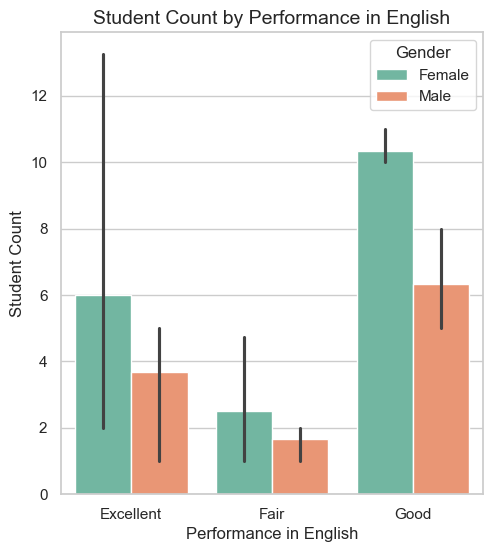

In [76]:
# Plot for Performance in English by Gender
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Performance in English', y='Student Count', hue='Gender', palette='Set2')
plt.title('Student Count by Performance in English', fontsize=14)
plt.xlabel('Performance in English', fontsize=12)
plt.ylabel('Student Count', fontsize=12)

image_path = '../../../docs/English_performance_gender.png'  
plt.savefig(image_path)

plt.show()

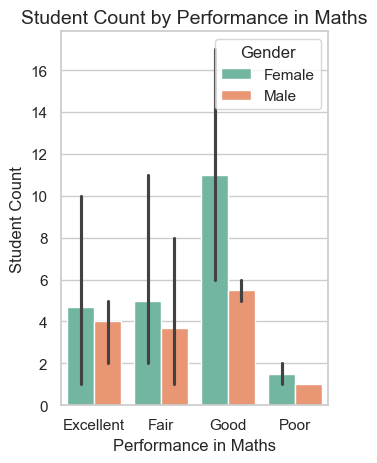

In [78]:
# Plot for Performance in Maths by Gender
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Performance in Maths', y='Student Count', hue='Gender', palette='Set2')
plt.title('Student Count by Performance in Maths', fontsize=14)
plt.xlabel('Performance in Maths', fontsize=12)
plt.ylabel('Student Count', fontsize=12)

# Adjusting the layout to ensure charts are displayed properly
plt.tight_layout()

image_path = '../../../docs/Maths_performance_gender.png' 
plt.savefig(image_path)

plt.show()

***

> ## Exploring the performance of students based on their respective departments: Science, Arts, and Commercial. By separating the data, we can gain insights into how different groups of students are performing across various subjects.

### Departments to Analyze
1. **Science**: Performance in Biology, Physics, and Chemistry.
2. **Arts**: Performance in Literature in English, Government, and Christian Religious Studies (CRS).
3. **Commercial**: Performance in Commerce, Accounting, and Economics.

#### SCIENCE

In [83]:
# SQL query for Science students
query_science = """
SELECT 
    Gender, 
    "Performance in Biology", 
    "Performance in Physics", 
    "Performance in Chemistry", 
    COUNT(*) AS student_count
FROM 
    student_performance
WHERE 
    Department = 'Science'
GROUP BY 
    Gender, "Performance in Biology", "Performance in Physics", "Performance in Chemistry"
ORDER BY 
    Gender, "Performance in Biology", "Performance in Physics", "Performance in Chemistry";
"""

with engine.connect() as conn:
    result_science = conn.execute(text(query_science))
    data_science = result_science.fetchall()

# Converting to a Pandas DataFrame for Science students
df_science = pd.DataFrame(data_science, columns=['Gender', 'Performance in Biology', 'Performance in Physics', 'Performance in Chemistry', 'Student Count'])

print("Science Students Data:")
df_science

Science Students Data:


,Gender,Performance in Biology,Performance in Physics,Performance in Chemistry,Student Count
0,Female,Excellent,Excellent,Excellent,3
1,Female,Excellent,Fair,Good,3
2,Female,Excellent,Good,Good,1
3,Female,Fair,Fair,Poor,1
4,Female,Fair,Good,Fair,1
5,Female,Fair,Good,Good,1
6,Female,Good,Excellent,Excellent,1
7,Female,Good,Excellent,Good,3
8,Female,Good,Fair,Excellent,1
9,Female,Good,Fair,Fair,1


### Performance Breakdown:

`Biology:`
Majority of students are performing well, with notable counts in the **Excellent** and **Good** categories.

`Physics:`
The Performance shows a more varied distribution, indicating some students may struggle more in this subject compared to Biology and Chemistry.

`Chemistry:`
Just like Biology, there are significant numbers of students achieving **Excellent** and **Good** performance.
Comparative Analysis:

The number of male and female students shows that female students tend to be represented more in certain performance categories, particularly in Biology.

There are instances of higher student counts for females in the "Good" performance category across subjects, indicating a strong overall performance by female students.

In [86]:
sns.set(style="whitegrid")

melted_df = df_science.melt(id_vars=['Gender', 'Student Count'], 
                             value_vars=['Performance in Biology', 'Performance in Physics', 'Performance in Chemistry'],
                             var_name='Subject', 
                             value_name='Performance')

<Figure size 1200x600 with 0 Axes>

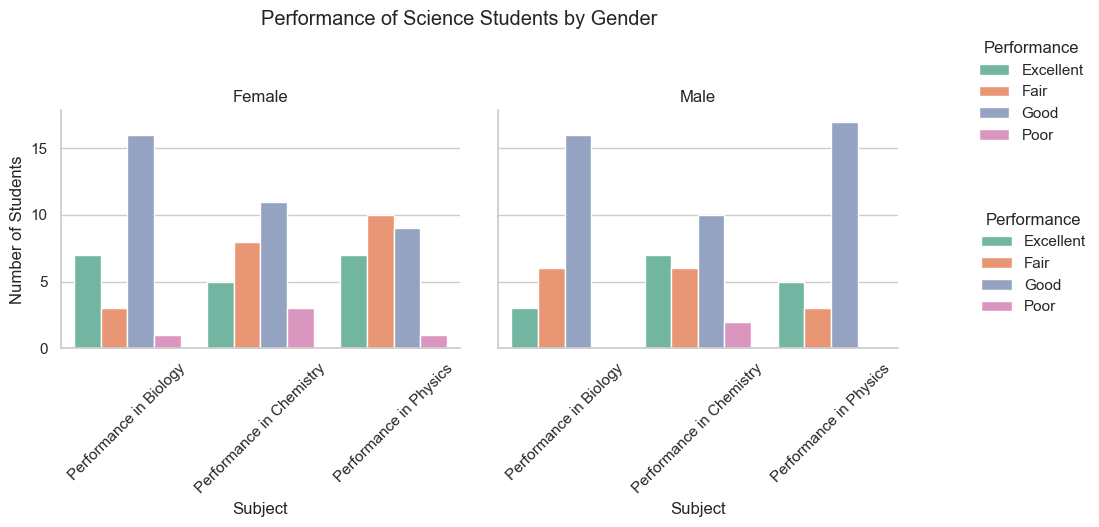

In [88]:
# Counting the number of students by Gender, Subject, and Performance
performance_counts = melted_df.groupby(['Gender', 'Subject', 'Performance'])['Student Count'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Creating a FacetGrid to plot performance across subjects
g = sns.catplot(
    data=performance_counts,
    x='Subject', 
    y='Student Count', 
    hue='Performance',
    col='Gender', 
    kind='bar', 
    height=5, 
    aspect=0.7,
    palette='Set2'
)

g.set_xticklabels(rotation=45)

g.set_axis_labels('Subject', 'Number of Students')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Performance of Science Students by Gender', y=1.05)

g.add_legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

image_path = '../../../docs/sciencecourses-gender-performance.png' 
plt.savefig(image_path)

plt.tight_layout() 
plt.show()

***

#### HUMANITIES

In [92]:
# SQL query for Arts students (Humanities)
query_humanities = """
SELECT 
    Gender, 
    "Performance in Lit in English", 
    "Performance in Government", 
    "Performance in CRS", 
    COUNT(*) AS student_count
FROM 
    student_performance
WHERE 
    Department = 'Humanities'
GROUP BY 
    Gender, "Performance in Lit in English", "Performance in Government", "Performance in CRS"
ORDER BY 
    Gender, "Performance in Lit in English", "Performance in Government", "Performance in CRS";
"""

with engine.connect() as conn:
    result_humanities = conn.execute(text(query_humanities))
    data_humanities = result_humanities.fetchall()

df_humanities = pd.DataFrame(data_humanities, columns=['Gender', 'Performance in Lit in English', 'Performance in Government', 'Performance in CRS', 'Student Count'])

# Display DataFrame (optional)
print("Humanities Students Data:")
df_humanities

Humanities Students Data:


,Gender,Performance in Lit in English,Performance in Government,Performance in CRS,Student Count
0,Female,Excellent,Excellent,Excellent,3
1,Female,Excellent,Fair,Good,1
2,Female,Excellent,Good,Excellent,7
3,Female,Excellent,Good,Good,1
4,Female,Fair,Excellent,Excellent,1
5,Female,Fair,Fair,Excellent,1
6,Female,Fair,Fair,Fair,1
7,Female,Fair,Fair,Good,1
8,Female,Fair,Good,Good,1
9,Female,Good,Excellent,Excellent,4


**Performance Trends**:
  - A considerable number of female students (11 out of 30) achieved **Excellent** performance across all subjects: Lit in English, Government, and CRS.
  - **Male students** displayed varied performances, with 4 students achieving **Excellent** ratings in multiple subjects.

- **Notable Patterns**:
  - **Females** generally performed better, with a higher count of **Excellent** ratings compared to males.

> This analysis suggests that while female students excel in Humanities.

In [95]:
sns.set(style="whitegrid")

melted_df_humanities = df_humanities.melt(id_vars=['Gender', 'Student Count'], 
                                            value_vars=['Performance in Lit in English', 'Performance in Government', 'Performance in CRS'],
                                            var_name='Subject', 
                                            value_name='Performance')

# Count the number of students by Gender, Subject, and Performance
performance_counts_humanities = melted_df_humanities.groupby(['Gender', 'Subject', 'Performance'])['Student Count'].sum().reset_index()

<Figure size 1200x600 with 0 Axes>

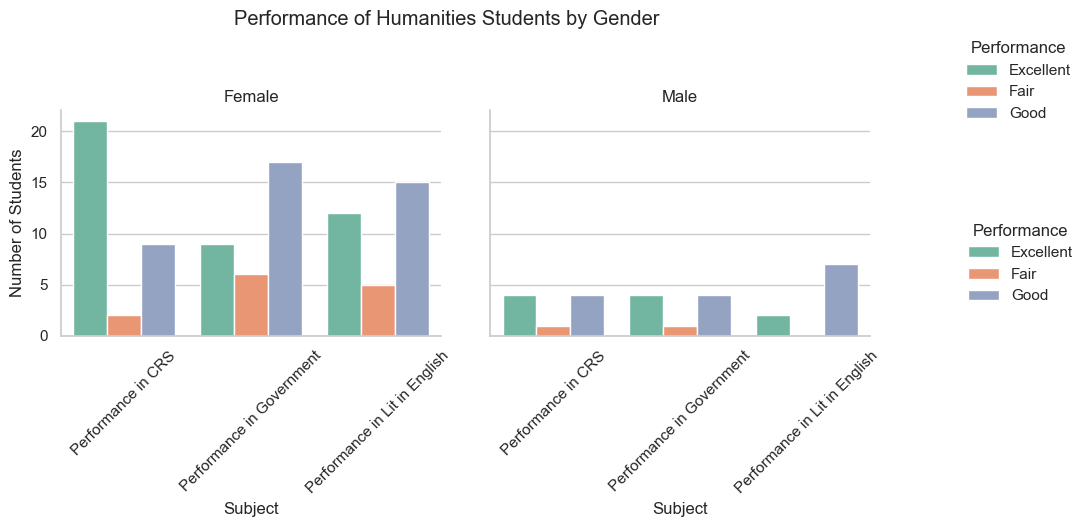

In [97]:
plt.figure(figsize=(12, 6))
g = sns.catplot(
    data=performance_counts_humanities,
    x='Subject', 
    y='Student Count', 
    hue='Performance',
    col='Gender', 
    kind='bar', 
    height=5, 
    aspect=0.7,
    palette='Set2'
)

g.set_xticklabels(rotation=45)

g.set_axis_labels('Subject', 'Number of Students')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Performance of Humanities Students by Gender', y=1.05)

g.add_legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

image_path = '../../../docs/humanitiescourses-gender-performance.png' 
plt.savefig(image_path)

plt.tight_layout()  # Adjusting layout to prevent clipping of tick-labels
plt.show()

____

### COMMERCIAL

In [101]:
# SQL query for Commercial students
query_commercial = """
SELECT 
    Gender, 
    "Performance in Commerce", 
    "Performance in Accounting", 
    "Performance in Economics", 
    COUNT(*) AS student_count
FROM 
    student_performance
WHERE 
    Department = 'Commercial'
GROUP BY 
    Gender, "Performance in Commerce", "Performance in Accounting", "Performance in Economics"
ORDER BY 
    Gender, "Performance in Commerce", "Performance in Accounting", "Performance in Economics";
"""

with engine.connect() as conn:
    result_commercial = conn.execute(text(query_commercial))
    data_commercial = result_commercial.fetchall()

df_commercial = pd.DataFrame(data_commercial, columns=['Gender', 'Performance in Commerce', 'Performance in Accounting', 'Performance in Economics', 'Student Count'])

print("Commercial Students Data:")
df_commercial.head()

Commercial Students Data:


,Gender,Performance in Commerce,Performance in Accounting,Performance in Economics,Student Count
0,Female,Excellent,Excellent,Excellent,1
1,Female,Excellent,Excellent,Fair,1
2,Female,Excellent,Excellent,Good,1
3,Female,Fair,Fair,Good,1
4,Female,Good,Good,Excellent,1


In [103]:
melted_df_commercial = df_commercial.melt(id_vars=['Gender', 'Student Count'], 
                                            value_vars=['Performance in Commerce', 'Performance in Accounting', 'Performance in Economics'],
                                            var_name='Subject', 
                                            value_name='Performance')

# Counting the number of students by Gender, Subject, and Performance
performance_counts_commercial = melted_df_commercial.groupby(['Gender', 'Subject', 'Performance'])['Student Count'].sum().reset_index()

<Figure size 1200x600 with 0 Axes>

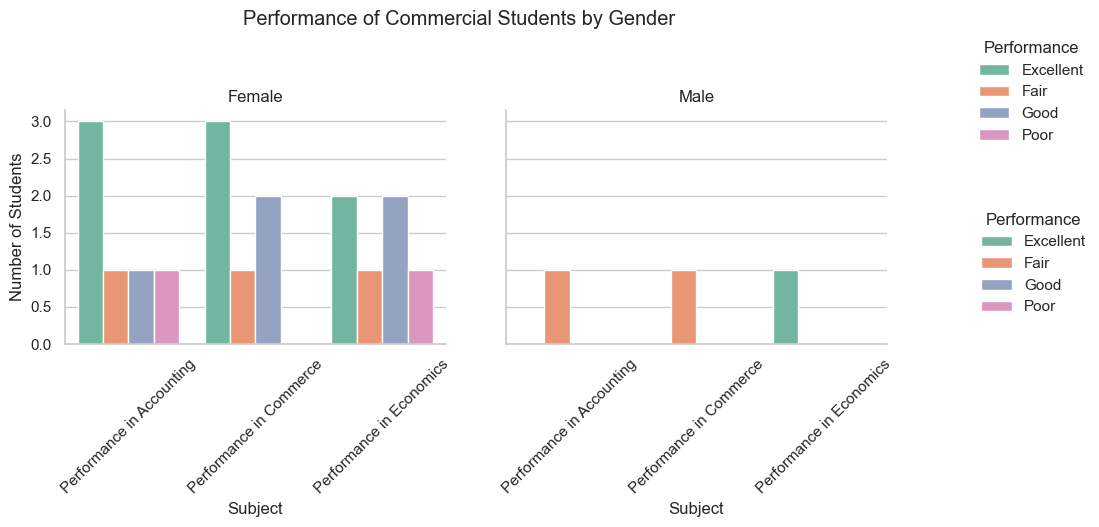

In [107]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
g = sns.catplot(
    data=performance_counts_commercial,
    x='Subject', 
    y='Student Count', 
    hue='Performance',
    col='Gender', 
    kind='bar', 
    height=5, 
    aspect=0.7,
    palette='Set2'
)

g.set_xticklabels(rotation=45)

g.set_axis_labels('Subject', 'Number of Students')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Performance of Commercial Students by Gender', y=1.05)

g.add_legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

image_path = '../../../docs/commercialcourses-gender-performance.png' 
plt.savefig(image_path)

plt.tight_layout()  
plt.show()

#### Insight on Commercial Students' Performance

The data collected on the performance of commercial students reveals several key insights:

- Among the commercial students interviewed, **females** showed a strong performance, with multiple students achieving **Excellent** ratings in subjects such as **Commerce**, **Accounting**, and **Economics**.
- The analysis included a total of **six students**, and the results indicated a mix of performance levels. Notably, one **male** student achieved an **Excellent** rating in **Economics**, while receiving **Fair** ratings in both **Commerce** and **Accounting**.
  
- **Note**: The sample size for the commercial students was limited, which may affect the generalizability of these insights. A more extensive dataset would provide a clearer understanding of performance trends within this department.


## Key Insights on Gender Performance Across Subjects

Our analysis of student performance across Science, Humanities, and Commercial subjects reveals important insights:

- **Science**: Female students generally excel in Biology and Chemistry, indicating strong skills in these areas. Male students also perform well but may need more encouragement.

- **Humanities**: Girls tend to outperform boys in English and Government, suggesting a greater engagement in these subjects.

- **Commercial Studies**: Female students show strength in Commerce and Accounting, while male students perform better in Economics.

- **Overall Patterns**: While girls excel in communication and analytical subjects, boys show strengths in technical areas. This suggests the need for tailored support for both genders.

### Limitation
- **Small Sample Size**: The limited number of students in the Commercial segment indicates that these findings should be interpreted with caution.

In summary, understanding these gender disparities can help educators foster an inclusive environment that supports all students, encouraging them to thrive in their respective strengths.


___

## Examines the correlation between gender and participation in extracurricular activities.

In [113]:
query = "SELECT * FROM student_performance LIMIT 5;"
df = pd.read_sql(query, con=engine)
df.head()

,Student ID,Gender,Age Group,Living Situation,Parent Education Level,Family Financial Status,Class,Department,Performance in English,Performance in Maths,...,School Learning Resources,Motivation for Attending School,Plan to Attend University,JAMB Goal Score,Extracurricular Hours,Free Time Activities,Language at Home,Involved in Work Outside School,Last Exam Performance,Foundational Knowledge
0,1001,Female,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,SS2,Science,Excellent,Good,...,Library,To learn and gain knowledge,Yes,200 To 250,Less than 5 hours,Doing chores at home,Yoruba,Frequently,60% - 69%,Average
1,1002,Female,15 - 16,Both parents,Higher Education,We can afford some luxuries,SS3,Science,Good,Good,...,Library,To prepare for a good career,Yes,300 And Above,5 - 10 hours,Others,Yoruba,Occasionally,70% - 100%,Strong
2,1003,Male,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,SS3,Science,Fair,Fair,...,Nil,To prepare for a good career,Not Sure,200 To 250,More than 10 hours,Playing sports,English,No,60% - 69%,Average
3,1004,Male,12 - 14,Both parents,Higher Education,We can afford some luxuries,SS3,Science,Good,Excellent,...,"Computer lab, Extra tutoring sessions",To learn and gain knowledge,Yes,300 And Above,Less than 5 hours,"Studying,Socializing with friends,Watching mov...",English,No,70% - 100%,Average
4,1005,Male,15 - 16,Single parent,Higher Education,We are financially comfortable,SS3,Science,Good,Fair,...,"Computer lab, Extra tutoring sessions",To prepare for a good career,Yes,200 To 250,Less than 5 hours,"Watching movies,Playing sports,Doing chores at...",English,No,60% - 69%,Strong


### Analyze Extracurricular Participation by Gender

In [116]:
query = """
SELECT "Extracurricular Participation", COUNT(*) as Count
FROM student_performance
GROUP BY "Extracurricular Participation"
"""

# Executing the query and fetch the results into a DataFrame
participation_counts = pd.read_sql(query, engine)

print(participation_counts)

  Extracurricular Participation  Count
0                    Not at all     16
1                  Occasionally     39
2                     Regularly     45


In [118]:
query = """
SELECT 
    Gender, 
    "Extracurricular Participation",  
    COUNT(*) AS Count
FROM 
    student_performance
GROUP BY 
    Gender, "Extracurricular Participation"  
ORDER BY 
    Gender, "Extracurricular Participation";  
"""

# Step 4: Execute the query and store the results in a DataFrame
extracurricular_participation_by_gender = pd.read_sql(query, engine)

# Step 5: Display the results
print(extracurricular_participation_by_gender)

   Gender Extracurricular Participation  Count
0  Female                    Not at all     12
1  Female                  Occasionally     28
2  Female                     Regularly     25
3    Male                    Not at all      4
4    Male                  Occasionally     11
5    Male                     Regularly     20


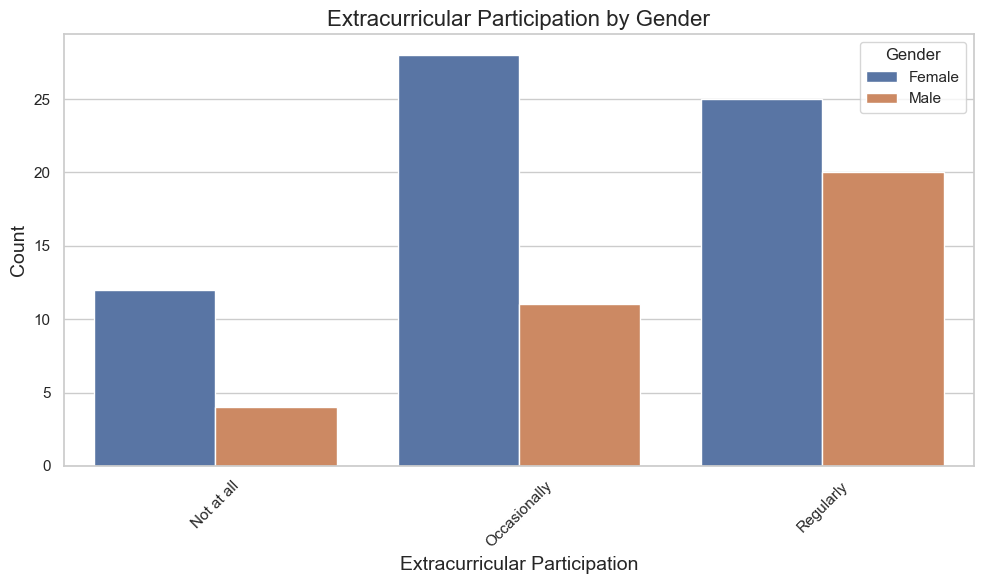

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(data=extracurricular_participation_by_gender, 
             x="Extracurricular Participation", 
             y="Count", 
             hue="Gender")

# Customize the plot
plt.title('Extracurricular Participation by Gender', fontsize=16)
plt.xlabel('Extracurricular Participation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()

image_path = '../../../docs/ExtracurricularParti-gender-performance.png' 
plt.savefig(image_path)

# Show the plot
plt.show()

In [128]:
female_data = extracurricular_participation_by_gender[extracurricular_participation_by_gender['Gender'] == 'Female']

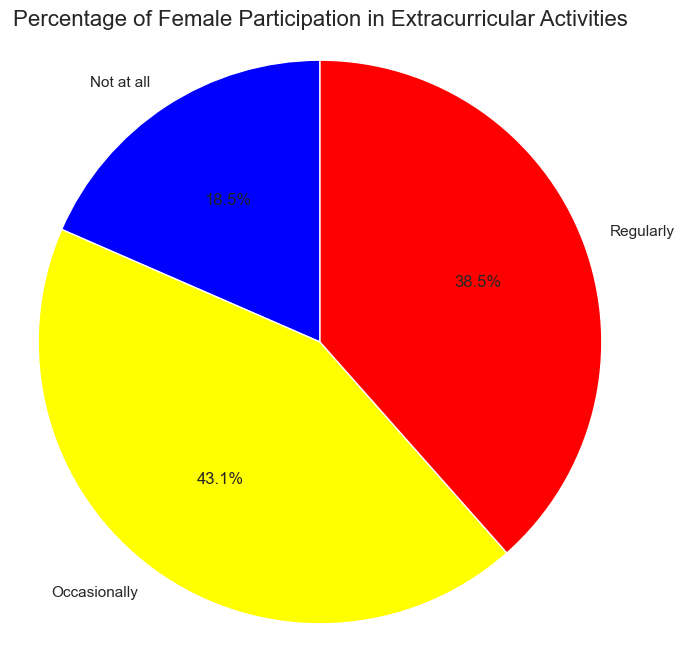

In [130]:
plt.figure(figsize=(8, 8))
plt.pie(
    female_data['Count'],
    labels=female_data['Extracurricular Participation'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'yellow', 'red']
)

plt.title('Percentage of Female Participation in Extracurricular Activities', fontsize=16)

plt.axis('equal')  

image_path = '../../../docs/PercentageFemaleExtra-gender-performance.png' 
plt.savefig(image_path)

plt.show()

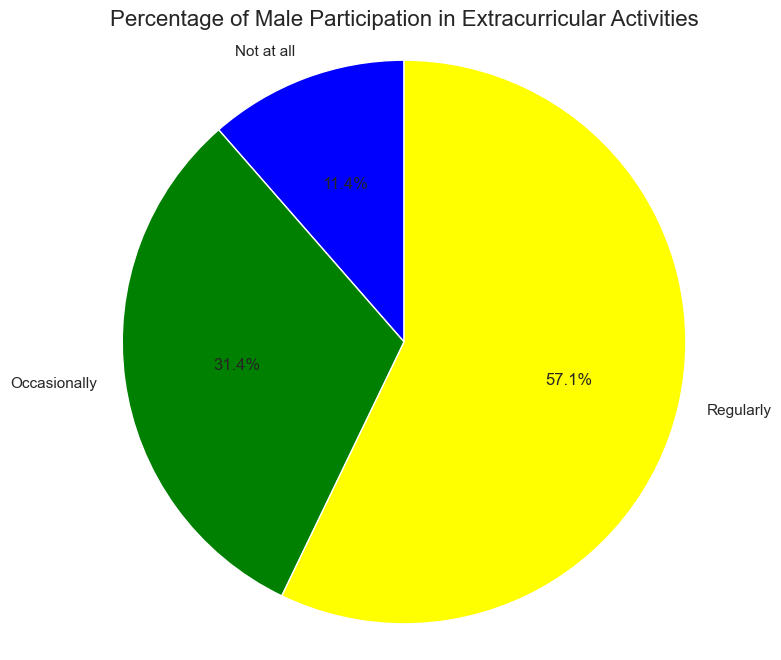

In [136]:
male_data = extracurricular_participation_by_gender[extracurricular_participation_by_gender['Gender'] == 'Male']

plt.figure(figsize=(8, 8))
plt.pie(
    male_data['Count'],
    labels=male_data['Extracurricular Participation'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'green', 'yellow']  # Specifying colors for the pie chart
)

plt.title('Percentage of Male Participation in Extracurricular Activities', fontsize=16)

plt.axis('equal')  

image_path = '../../../docs/PercentageMaleExtra-gender-performance.png' 
plt.savefig(image_path)

plt.show()


# Analysis of Extracurricular Participation by Gender

In our analysis, we recognized that the distribution of male and female participants in the dataset is unequal. To explore this further, we focused on understanding extracurricular participation with respect to both genders.

## Female Participation
The findings for female participation in extracurricular activities are as follows:
- **Not at all**: 18.5%
- **Occasionally**: 43.1%
- **Regularly**: 38.5%

These results indicate that a significant proportion of females (43.1%) engage in extracurricular activities occasionally, while a notable 38.5% participate regularly. This suggests that `females are moderately involved in extracurricular activities`, which can enhance their social skills and overall well-being. However, the 18.5% who do not participate at all could reflect barriers or disinterest that may need to be addressed to foster greater involvement.

## Male Participation
The findings for male participation in extracurricular activities are as follows:
- **Not at all**: 11.4%
- **Occasionally**: 31.4%
- **Regularly**: 57.1%

In contrast, a majority of males (57.1%) participate regularly, while only 11.4% do not participate at all. `This indicates a strong tendency among males to engage in extracurricular activities`, which can be linked to various benefits such as teamwork, leadership skills, and enhanced academic performance.

## Comparison of Participation
Comparing the participation rates:
- Females show a higher tendency to participate occasionally (43.1%) compared to males (31.4%).
- However, males have a significantly higher percentage of regular participation (57.1%) than females (38.5%).

**This comparison highlights that while females may be more inclined to dip into activities occasionally, males tend to commit to these activities more regularly.** 

## Next Steps
Now, we will compare academic performance with extracurricular participation to see if there is any correlation. This analysis will help us understand whether participation in extracurricular activities impacts academic achievement differently for males and females.

___